In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")
import pandas as pd


In [218]:
df = pd.read_csv('sample.csv',encoding = "ISO-8859-1")
df.iloc[:, 0]
df
df = df4
df


,ONI,nino3.4,PNA,Precip,SOI
0,-0.8,-1.13,-0.41,54.06,1.5
1,-0.5,-0.74,-1.36,51.97,0.9
2,-0.2,-0.77,-0.81,56.86,-0.1
3,0.2,-0.17,0.73,53.61,-0.3
4,0.4,-0.10,1.26,53.37,-0.7
...,...,...,...,...,...
847,-0.5,-0.38,0.95,78.39,0.6
848,-0.7,-0.50,0.44,59.79,0.8
849,-0.8,-0.78,1.13,80.21,0.7
850,-1.0,-0.88,0.72,31.10,1.0


In [282]:

def scaler_from_0to1(series):
     return (series - series.min()) / (series.max() - series.min())

df['Precip'] = scaler_from_0to1(df['Precip'])

In [283]:
df

,ONI,nino3.4,PNA,Precip,SOI
0,-0.8,-1.13,-0.41,0.417286,1.5
1,-0.5,-0.74,-1.36,0.390040,0.9
2,-0.2,-0.77,-0.81,0.453787,-0.1
3,0.2,-0.17,0.73,0.411420,-0.3
4,0.4,-0.10,1.26,0.408291,-0.7
...,...,...,...,...,...
847,-0.5,-0.38,0.95,0.734454,0.6
848,-0.7,-0.50,0.44,0.491983,0.8
849,-0.8,-0.78,1.13,0.758180,0.7
850,-1.0,-0.88,0.72,0.117977,1.0


In [284]:
col_names = ['ONI', 'nino3.4', 'PNA', 'Precip', 'SOI']
for col in col_names:
    mode_value = df[col].mode().values
    df[col].fillna(mode_value[0], inplace = True)

In [285]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i).iloc[:,-1])
        if i == 0:
            names += ['VAR(t)']
        else:
            names += ['VAR(t+%d)' % i]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [286]:
enso = df.values.astype('float32')
lag = 12
ahead = 3
n_features = 1
reframed = series_to_supervised(enso, lag, ahead)
# np.ndim(reframed)
# len(reframed)

# rr

reframed


,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),var5(t-11),...,var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),VAR(t),VAR(t+1),VAR(t+2)
12,-0.8,-1.13,-0.41,0.417286,1.5,-0.5,-0.74,-1.36,0.390040,0.9,...,0.437622,-0.8,0.8,0.71,-1.29,0.616738,-0.7,-0.9,-0.6,0.5
13,-0.5,-0.74,-1.36,0.390040,0.9,-0.2,-0.77,-0.81,0.453787,-0.1,...,0.616738,-0.7,0.5,0.39,-1.98,0.482597,-0.9,-0.6,0.5,-0.2
14,-0.2,-0.77,-0.81,0.453787,-0.1,0.2,-0.17,0.73,0.411420,-0.3,...,0.482597,-0.9,0.4,0.24,0.28,0.302959,-0.6,0.5,-0.2,0.8
15,0.2,-0.17,0.73,0.411420,-0.3,0.4,-0.10,1.26,0.408291,-0.7,...,0.302959,-0.6,0.3,0.04,-0.40,0.565376,0.5,-0.2,0.8,0.7
16,0.4,-0.10,1.26,0.408291,-0.7,0.6,-0.09,-0.61,0.758050,0.2,...,0.565376,0.5,0.3,0.41,1.16,0.433060,-0.2,0.8,0.7,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,-0.3,-0.21,0.70,0.612567,-0.4,-0.4,-0.04,1.73,0.683744,0.4,...,0.389649,0.3,-0.5,-0.41,-1.35,0.593143,0.5,0.4,1.4,0.6
846,-0.4,-0.04,1.73,0.683744,0.4,-0.6,-0.42,1.82,0.537218,1.1,...,0.593143,0.5,-0.4,-0.06,0.67,0.687655,0.4,1.4,0.6,0.8
847,-0.6,-0.42,1.82,0.537218,1.1,-0.9,-0.66,0.75,0.447269,0.9,...,0.687655,0.4,-0.4,-0.20,0.56,0.805371,1.4,0.6,0.8,0.7
848,-0.9,-0.66,0.75,0.447269,0.9,-1.2,-1.19,-1.13,0.452614,0.5,...,0.805371,1.4,-0.5,-0.38,0.95,0.734454,0.6,0.8,0.7,1.0


In [287]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from keras.layers import Activation, Dense 
from keras.layers import Dropout


In [223]:
# """
# This method takes training data and returns a LSTM model
# train: training data
# n_lag: number of previous time steps
# n_ahead: number of next time steps
# nb_epoch: number of epochs
# n_neurons: number of n_neurons in the first layer
# """
# def fit_lstm(train, n_lag, n_ahead, n_batch, nb_epoch, n_neurons):
#     # reshape training into [samples, timesteps, features]
#     X, y = train[:, :-n_ahead], train[:, -n_ahead:]
#     X = X.reshape(X.shape[0], n_lag, int(X.shape[1]/n_lag))

#     # design neural network architecture. This is a simple LSTM just for demo purpose
#     model = keras.Sequential()
#     model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
#     model.add(Dense(n_ahead))
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     # fit the NN
#     for i in range(nb_epoch):
#         model.fit(X, y, epochs=1, batch_size=n_batch, verbose=2, shuffle=False)
#         model.reset_states()
#     return model

In [312]:
values = reframed.values
n_train = int(len(values) * 0.8)
train = values[:n_train, :]
test = values[n_train:, :]

X, y = train[:, :-ahead], train[:, -ahead:]

X = X.reshape(X.shape[0], lag, int(X.shape[1]/lag))

model = keras.Sequential()
model.add(LSTM(30, batch_input_shape=(1, X.shape[1], X.shape[2]), stateful=True))
# model.add(LSTM(50, batch_input_shape=(1, X.shape[1], X.shape[2]), return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 50))
# model.add(Dropout(0.2))




model.add(Dense(ahead))

model.compile(loss='mean_squared_error', optimizer='adam')

# fit the NN
for i in range(1):
  model.fit(X, y, epochs=1, batch_size=1, verbose=2, shuffle=False)
  model.reset_states()





670/670 - 5s - loss: 0.6041 - 5s/epoch - 7ms/step


In [313]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (1, 30)                   4320      
                                                                 
 dense_16 (Dense)            (1, 3)                    93        
                                                                 
Total params: 4,413
Trainable params: 4,413
Non-trainable params: 0
_________________________________________________________________


In [307]:
# predict the SOI values for next three time steps given a single input sample 
def forecast_lstm(model, X, n_batch, n_lag):
    # reshape input pattern to [samples, timesteps, features]
    X = X.reshape(1, n_lag, int(len(X)/n_lag))
    # make forecast
    forecast = model.predict(X, batch_size=n_batch)
    # convert to array
    return [x for x in forecast[0, :]]

# make prediciton for a list of input samples
def make_forecasts(model, n_batch, train, test, n_lag, n_ahead):
    forecasts = list()
    for i in range(len(test)):
        X = test[i, :-n_ahead]
        # make forecast
        forecast = forecast_lstm(model, X, n_batch, n_lag)
        # store the forecast
        forecasts.append(forecast)
    return forecasts

In [ ]:
print(test)
forecasts = make_forecasts(model, 1, train, test, lag, ahead)
# pring out the output for the first input sample
forecasts

In [315]:
from sklearn.metrics import f1_score
print(np.shape(test))
print(df4['SOI'].iloc[670:])
#print(test)

print(forecasts)
# f1_score(df4['SOI'].iloc[670:],forecasts)

(168, 63)
670    0.1
671   -0.3
672   -0.8
673   -0.1
674    0.2
      ... 
847    0.6
848    0.8
849    0.7
850    1.0
851    1.5
Name: SOI, Length: 182, dtype: float64
[[0.72486687, 0.8204339, 0.80560166], [0.87238425, 0.9653679, 0.9234783], [1.0463012, 1.154837, 1.046855], [1.1512773, 1.2315571, 1.096681], [1.2586083, 1.3127707, 1.0875968], [1.1864648, 1.1393876, 0.99553585], [1.0021732, 0.8537112, 0.7854046], [0.7333906, 0.5425184, 0.4957652], [0.5840888, 0.40451592, 0.3548929], [0.34547737, 0.21200903, 0.12882167], [0.30667046, 0.21091874, 0.08927833], [0.37143967, 0.28280747, 0.13374491], [0.45884463, 0.37823182, 0.20422699], [0.560367, 0.47555277, 0.28154716], [0.6459435, 0.58250636, 0.4412089], [0.7302224, 0.61251676, 0.48271555], [0.796365, 0.6681927, 0.5548131], [0.64329284, 0.4500702, 0.39585516], [0.503976, 0.29210225, 0.2181083], [0.17558649, -0.010345586, -0.09256179], [-0.04392159, -0.16797441, -0.26986054], [-0.15967727, -0.23038349, -0.34282988], [-0.27906793, -0.30177

In [ ]:
forecasts

In [296]:
np.shape(forecasts)

(168, 3)

In [297]:
import math
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot


In [299]:
def evaluate_forecasts(y, forecasts, n_lag, n_seq):
    print('Evaluation results (RMSE) for each next tim step:')
    for i in range(n_seq):
        actual = [row[i] for row in y]
        predicted = [forecast[i] for forecast in forecasts]
        rmse = math.sqrt(mean_squared_error(actual, predicted))
        print('t+%d time step: %f' % ((i+1), rmse))
        
# evaluate forecasts
actual = [row[-ahead:] for row in test]
evaluate_forecasts(actual, forecasts, lag, ahead)

Evaluation results (RMSE) for each next tim step:
t+1 time step: 0.744418
t+2 time step: 0.764536
t+3 time step: 0.791663


In [ ]:
actual = [row[-ahead:] for row in test]
actual

In [300]:
df.columns

Index(['ONI', 'nino3.4', 'PNA', 'Precip', 'SOI'], dtype='object')

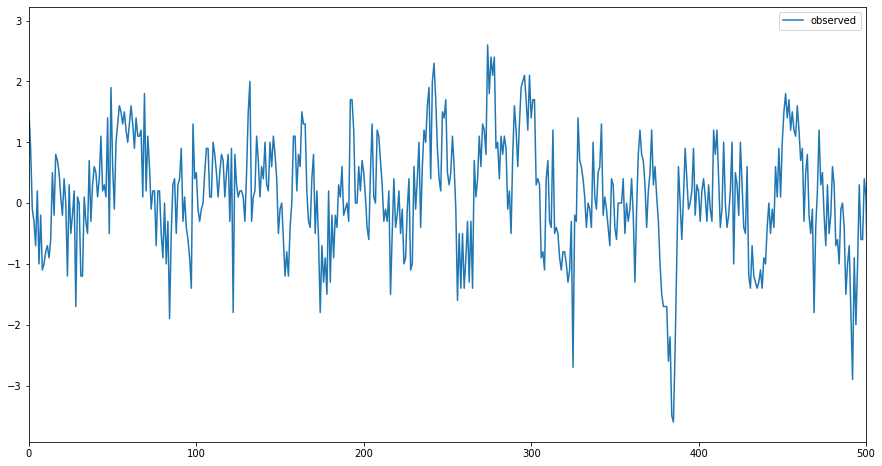

In [320]:
def plot_forecasts(series, forecasts, n_test, xlim, ylim, n_ahead, linestyle = None):
  pyplot.figure(figsize=(15,8))
  if linestyle==None:
    pyplot.plot(series, label='observed')
  else:
    pyplot.plot(series, linestyle, label='observed')
  pyplot.xlim(xlim, ylim)
  pyplot.legend(loc='upper right')
    # plot the forecasts in red
  for i in range(len(forecasts)):
        # this ensures not all segements are plotted, it is plotted every n_ahead
    if i%n_ahead ==0:
      off_s = len(series) - n_test + 2 + i - 1
      off_e = off_s + len(forecasts[i]) + 1
      xaxis = [x for x in range(off_s, off_e)]
      yaxis = [series[off_s]] + forecasts[i] 
      pyplot.plot(xaxis, yaxis, 'r')
  pyplot.show()
    
plot_forecasts(df['SOI'].values, forecasts, test.shape[0] + ahead - 1, 0, 500, ahead)

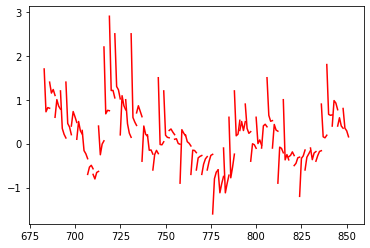

In [319]:
def plot_forecasts(series, forecasts, n_test, xlim, ylim, n_ahead, linestyle = None): 
  for i in range(len(forecasts)):
        # this ensures not all segements are plotted, it is plotted every n_ahead
    if i%ahead ==0:
      off_s = len(series) - n_test + 2 + i - 1
      off_e = off_s + len(forecasts[i]) + 1
      xaxis = [x for x in range(off_s, off_e)]
      yaxis = [series[off_s]] + forecasts[i] 
      pyplot.plot(xaxis, yaxis, 'r')
  pyplot.show()

plot_forecasts(df['SOI'].values, forecasts, test.shape[0] + ahead - 1, 0, 500, ahead)

In [ ]:
df1 = pd.read_csv('SOI.csv',encoding = "ISO-8859-1")

var = (df1[df1.columns[1:]].values).flatten()

print(var[13])

df1.columns

-0.6


In [ ]:
df2 = pd.DataFrame([[year, month] for month in df1.columns[1:] for year in df1.iloc[:,0] ],columns=['year','months'])
df2

In [ ]:
df3 = pd.read_csv('ONI.csv',encoding = "ISO-8859-1")

var = (df3[df3.columns[1:]].values).flatten()

print(var[13])

df2['ONI'] = var

df2

In [ ]:
df3 = pd.read_csv('nino3.4.csv',encoding = "ISO-8859-1")

var = (df3[df3.columns[1:]].values).flatten()

df2['nino3.4'] = var

df2

In [ ]:
df3 = pd.read_csv('PNA.csv',encoding = "ISO-8859-1")

var = (df3[df3.columns[1:]].values).flatten()

print(var[13])

df2['PNA'] = var

df2

In [ ]:
df3 = pd.read_csv('Precip.csv',encoding = "ISO-8859-1")

var = (df3[df3.columns[1:]].values).flatten()

print(np.shape(var))

df2['Precip'] = var

df2

In [ ]:
df1 = pd.read_csv('SOI.csv',encoding = "ISO-8859-1")

var = (df1[df1.columns[1:]].values).flatten()

print(var[13])
df2['SOI'] = var


In [240]:
df4 = df2[df2.columns[2:7]]
df4.tail(12)

,ONI,nino3.4,PNA,Precip,SOI
852,NaN,NaN,NaN,NaN,NaN
853,NaN,NaN,NaN,NaN,NaN
854,NaN,NaN,NaN,NaN,NaN
855,NaN,NaN,NaN,NaN,NaN
856,NaN,NaN,NaN,NaN,NaN
857,NaN,NaN,NaN,NaN,NaN
858,NaN,NaN,NaN,NaN,NaN
859,NaN,NaN,NaN,NaN,NaN
860,NaN,NaN,NaN,NaN,NaN
861,NaN,NaN,NaN,NaN,NaN


In [242]:
df4 = df4.drop(df4.index[852:])
df4.tail(12)

,ONI,nino3.4,PNA,Precip,SOI
840,-1.0,-1.04,0.19,49.05,1.9
841,-0.9,-0.94,-0.31,48.78,1.5
842,-0.8,-0.72,-0.97,62.51,0.4
843,-0.7,-0.55,-1.05,51.94,0.3
844,-0.5,-0.41,-1.35,67.55,0.5
845,-0.4,-0.06,0.67,74.80,0.4
846,-0.4,-0.20,0.56,83.83,1.4
847,-0.5,-0.38,0.95,78.39,0.6
848,-0.7,-0.50,0.44,59.79,0.8
849,-0.8,-0.78,1.13,80.21,0.7


In [243]:
df4['SOI'].iloc[670:]

670    0.1
671   -0.3
672   -0.8
673   -0.1
674    0.2
      ... 
847    0.6
848    0.8
849    0.7
850    1.0
851    1.5
Name: SOI, Length: 182, dtype: float64